In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("ADc1_day.xlsx")

In [3]:
df.head()

,Timestamp,Open,High,Low,Close,Volume
0,2011-03-01 22:01:00,1.0132,1.0137,1.0064,1.0080,58122
1,2011-04-01 22:01:00,1.0073,1.0084,0.9942,0.9965,102186
2,2011-05-01 22:01:00,0.9974,0.9991,0.9876,0.9911,112898
3,2011-06-01 22:01:00,0.9914,0.9935,0.9852,0.9861,96649
4,2011-07-01 22:01:00,0.9868,0.9915,0.9828,0.9875,112194


## Data prep

In [4]:
df['rows'] = df.reset_index().index

In [5]:
df['hl'] = df['High'] - df['Low']

In [6]:
df['oc'] = abs(df['Open'] - df['Close'])

In [7]:
df['Timestamp'] = df['rows']

In [8]:
df = df.rename(columns={'Timestamp': 'Rows'})

In [9]:
df['hlc/3'] = (df['High'] + df['Low'] + df['Close'])/3.0

In [10]:
df['hl-oc'] = df['hl']-df['oc']

In [11]:
df['hl/vol'] = (df['hl']/df['Volume'])

In [12]:
df.head()

,Rows,Open,High,Low,Close,Volume,rows,hl,oc,hlc/3,hl-oc,hl/vol
0,0,1.0132,1.0137,1.0064,1.0080,58122,0,0.0073,0.0052,1.009367,0.0021,1.255979e-07
1,1,1.0073,1.0084,0.9942,0.9965,102186,1,0.0142,0.0108,0.999700,0.0034,1.389623e-07
2,2,0.9974,0.9991,0.9876,0.9911,112898,2,0.0115,0.0063,0.992600,0.0052,1.018619e-07
3,3,0.9914,0.9935,0.9852,0.9861,96649,3,0.0083,0.0053,0.988267,0.0030,8.587776e-08
4,4,0.9868,0.9915,0.9828,0.9875,112194,4,0.0087,0.0007,0.987267,0.0080,7.754425e-08


In [13]:
df['hl/vol'] = (df['hl']/df['Volume'])*10**7 #might need to check the data here for multiplier else leave

In [14]:
df = df.drop(['rows'], axis = 1)

## Stats

In [33]:
df.shape

(3424, 11)

In [15]:
df.describe()

,Rows,Open,High,Low,Close,Volume,hl,oc,hlc/3,hl-oc,hl/vol
count,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000
mean,1711.500000,0.815429,0.819178,0.811858,0.815445,58413.265187,0.007320,0.003582,0.815494,0.003738,391.964857
std,988.567988,0.129385,0.130631,0.128698,0.129434,57050.074205,0.013216,0.003545,0.129440,0.012620,967.516774
min,0.000000,0.572300,0.584100,0.554600,0.568000,1.000000,0.000000,0.000000,0.572533,0.000000,0.000000
25%,855.750000,0.717938,0.720938,0.715100,0.718075,131.750000,0.003900,0.001000,0.717912,0.001400,0.809035
50%,1711.500000,0.761450,0.764550,0.758850,0.761650,65017.000000,0.006400,0.002600,0.761800,0.002900,1.246116
75%,2567.250000,0.929900,0.932625,0.926150,0.929825,99521.500000,0.009213,0.005050,0.929775,0.004900,296.931612
max,3423.000000,1.096300,1.592500,1.092400,1.096300,873890.000000,0.728700,0.033200,1.110900,0.719500,12250.000000


In [41]:
df.describe(percentiles=[.3, .6, .9]) 

,Rows,Open,High,Low,Close,Volume,hl,oc,hlc/3,hl-oc,hl/vol
count,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000
mean,1711.500000,0.815429,0.819178,0.811858,0.815445,58413.265187,0.007320,0.003582,0.815494,0.003738,391.964857
std,988.567988,0.129385,0.130631,0.128698,0.129434,57050.074205,0.013216,0.003545,0.129440,0.012620,967.516774
min,0.000000,0.572300,0.584100,0.554600,0.568000,1.000000,0.000000,0.000000,0.572533,0.000000,0.000000
30%,1026.900000,0.725600,0.728600,0.722500,0.725700,302.700000,0.004500,0.001300,0.725567,0.001700,0.875498
50%,1711.500000,0.761450,0.764550,0.758850,0.761650,65017.000000,0.006400,0.002600,0.761800,0.002900,1.246116
60%,2053.800000,0.778740,0.781900,0.775880,0.778800,80103.000000,0.007400,0.003400,0.778693,0.003600,2.545683
90%,3080.700000,1.032540,1.036270,1.028100,1.032570,126873.900000,0.012800,0.008185,1.031747,0.007100,1327.785102
max,3423.000000,1.096300,1.592500,1.092400,1.096300,873890.000000,0.728700,0.033200,1.110900,0.719500,12250.000000


# STATES

In [16]:
import pandas as pd
import numpy as np
!pip install kmodes
!pip install kmeans
from kmodes.kmodes import KModes
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

You should consider upgrading via the 'C:\Users\sujay\anaconda3\python.exe -m pip install --upgrade pip' command.
  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [19 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  creating build\lib.win-amd64-3.9\kmeans
  copying kmeans\performance.py -> build\lib.win-amd64-3.9\kmeans
  copying kmeans\tests.py -> build\lib.win-amd64-3.9\kmeans
  copying kmeans\__init__.py -> build\lib.win-amd64-3.9\kmeans
  running egg_info
  writing kmeans.egg-info\PKG-INFO
  writing dependency_links to kmeans.egg-info\dependency_links.txt
  writing top-level names to kmeans.egg-info\top_level.txt
  reading manifest file 'kmeans.egg-info\SOURCES.txt'
  writing manifest file 'kmeans.egg-info\SOURCES.txt'
  copying kmeans\lib.c -> build\lib.win-amd64-3.9\kmeans
  running build_ext
  building 'kmeans/lib' extension
  error: 

  Using cached kmeans-1.0.2.tar.gz (5.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for kmeans
Failed to build kmeans
  Running setup.py install for kmeans: started
  Running setup.py install for kmeans: finished with status 'error'


In [17]:
dfs = df

In [18]:
df1 = dfs.fillna('Not Available')

In [19]:
df1=dfs

In [20]:
df1 = df1.set_index(['Rows','Open','High','Low','Close', 'hlc/3'])

In [21]:
df1.head()

,,,,,,Volume,hl,oc,hl-oc,hl/vol
Rows,Open,High,Low,Close,hlc/3,,,,,
0,1.0132,1.0137,1.0064,1.0080,1.009367,58122,0.0073,0.0052,0.0021,1.255979
1,1.0073,1.0084,0.9942,0.9965,0.999700,102186,0.0142,0.0108,0.0034,1.389623
2,0.9974,0.9991,0.9876,0.9911,0.992600,112898,0.0115,0.0063,0.0052,1.018619
3,0.9914,0.9935,0.9852,0.9861,0.988267,96649,0.0083,0.0053,0.0030,0.858778
4,0.9868,0.9915,0.9828,0.9875,0.987267,112194,0.0087,0.0007,0.0080,0.775443


In [22]:
df1 = df1.fillna('Not Available')

#### Data cleaning a.p. datasets

In [36]:
index1 = df1[ (df1['hl-oc'] >= 0.2) ].index
df1.drop(index1 , inplace=True)
df1.head(15)

,,,,,,Volume,hl,oc,hl-oc,hl/vol
Rows,Open,High,Low,Close,hlc/3,,,,,
0,1.0132,1.0137,1.0064,1.0080,1.009367,58122,0.0073,0.0052,0.0021,1.255979
1,1.0073,1.0084,0.9942,0.9965,0.999700,102186,0.0142,0.0108,0.0034,1.389623
2,0.9974,0.9991,0.9876,0.9911,0.992600,112898,0.0115,0.0063,0.0052,1.018619
3,0.9914,0.9935,0.9852,0.9861,0.988267,96649,0.0083,0.0053,0.0030,0.858778
4,0.9868,0.9915,0.9828,0.9875,0.987267,112194,0.0087,0.0007,0.0080,0.775443
5,0.9870,0.9905,0.9806,0.9878,0.986300,88184,0.0099,0.0008,0.0091,1.122653
6,0.9861,0.9874,0.9744,0.9797,0.980500,116462,0.0130,0.0064,0.0066,1.116244
7,0.9758,0.9892,0.9736,0.9887,0.983833,106147,0.0156,0.0129,0.0027,1.469660
8,0.9888,0.9948,0.9845,0.9904,0.989900,100121,0.0103,0.0016,0.0087,1.028755


In [37]:
df1.shape

(3423, 5)

## K-means clustering

In [38]:
#df1=df1.drop(columns = ['Cluster']) #for using again
X=df1

In [39]:
import warnings
warnings.filterwarnings('ignore')

wcss = []

for i in range(1,15):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

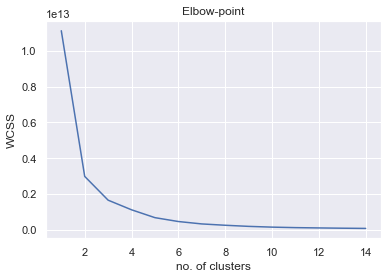

In [40]:
sns.set()
plt.plot(range(1,15),wcss)
plt.title('Elbow-point')
plt.xlabel('no. of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
#Building the model with 5 clusters
kmode = KModes(n_clusters=5, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df1)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 81, cost: 16548.0
Run 1, iteration: 2/100, moves: 1, cost: 16548.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 54, cost: 16501.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 34, cost: 16519.0
Run 3, iteration: 2/100, moves: 1, cost: 16519.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 57, cost: 16547.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 26, cost: 16559.0
Best run was number 2


array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [43]:
#df1=df1.drop(columns = ['Cluster']) # USE WHEN RESUSING
df1.insert(0, "Cluster", clusters, True)
df1.head()

,,,,,,Cluster,Volume,hl,oc,hl-oc,hl/vol
Rows,Open,High,Low,Close,hlc/3,,,,,,
0,1.0132,1.0137,1.0064,1.0080,1.009367,0,58122,0.0073,0.0052,0.0021,1.255979
1,1.0073,1.0084,0.9942,0.9965,0.999700,0,102186,0.0142,0.0108,0.0034,1.389623
2,0.9974,0.9991,0.9876,0.9911,0.992600,0,112898,0.0115,0.0063,0.0052,1.018619
3,0.9914,0.9935,0.9852,0.9861,0.988267,0,96649,0.0083,0.0053,0.0030,0.858778
4,0.9868,0.9915,0.9828,0.9875,0.987267,0,112194,0.0087,0.0007,0.0080,0.775443


In [44]:
df1.groupby(['Cluster']).size()

Cluster
0    3179
1      85
2      17
3      56
4      86
dtype: int64

In [47]:
'''
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
'''
# just in case

"\npd.set_option('display.max_rows', None)\npd.set_option('display.max_columns', None)\npd.set_option('display.width', None)\npd.set_option('display.max_colwidth', -1)\n"

In [49]:
df1.loc[(df1['Cluster']==1)] #use 1,2,3.. to view the clusters

,,,,,,Cluster,Volume,hl,oc,hl-oc,hl/vol
Rows,Open,High,Low,Close,hlc/3,,,,,,
63,1.01430,1.02190,1.01430,1.01430,1.016833,1,66935,0.00760,0.0,0.00760,1.135430
168,1.09310,1.09520,1.08420,1.09310,1.090833,1,122007,0.01100,0.0,0.01100,0.901588
264,0.98050,0.98690,0.97820,0.98050,0.981867,1,111183,0.00870,0.0,0.00870,0.782494
377,1.03090,1.03130,1.03030,1.03090,1.030833,1,918,0.00100,0.0,0.00100,10.893246
405,0.97470,0.97930,0.96920,0.97470,0.974400,1,165914,0.01010,0.0,0.01010,0.608749
468,1.05260,1.05520,1.04960,1.05260,1.052467,1,85451,0.00560,0.0,0.00560,0.655346
516,1.02900,1.03360,1.02580,1.02900,1.029467,1,100951,0.00780,0.0,0.00780,0.772652
674,1.02480,1.02520,1.02430,1.02480,1.024767,1,708,0.00090,0.0,0.00090,12.711864
722,0.91780,0.91810,0.91660,0.91780,0.917500,1,1152,0.00150,0.0,0.00150,13.020833


In [50]:
C2=df1.loc[(df1['Cluster']==1)] #use 1,2,3.. to view the clusters

In [51]:
C2.describe()

,Cluster,Volume,hl,oc,hl-oc,hl/vol
count,85.0,85.000000,85.000000,85.0,85.000000,85.000000
mean,1.0,26478.529412,0.002917,0.0,0.002917,127.874135
std,0.0,47892.646662,0.005016,0.0,0.005016,504.156658
min,1.0,1.000000,0.000000,0.0,0.000000,0.000000
25%,1.0,4.000000,0.000000,0.0,0.000000,0.000000
50%,1.0,545.000000,0.000700,0.0,0.000700,0.891698
75%,1.0,35396.000000,0.004100,0.0,0.004100,9.609610
max,1.0,206826.000000,0.037400,0.0,0.037400,3562.500000


In [52]:
df1.to_excel('ADC_CLUSTERS.xls', index=True)